# Curso de Big Data

## Trabajo Práctico 1 - Parte 2

### Reglas de formato y presentación
- El trabajo debe estar bien comentado (utilizando #) para que el código sea fácil de entender por sus compañeros y profesores.

- El mismo debe ser completado en este Jupyter Notebook y entregado como tal, es decir en un archivo .ipynb


### Fecha de entrega:
Miércoles 4 de octubre a las 23:59hs

### Modalidad de entrega
- Al finalizar el trabajo práctico deben hacer un último <i>commit</i> en su repositorio de GitHub con el mensaje “Entrega final del tp”. 
- Asegurense de haber creado una carpeta llamada TP1. Este Jupyter Notebook y el correspondiente al TP1 - Parte 1 deben estar dentro de esa carpeta.
- También deben completar el link de su repositorio -para que pueda ser clonado y corregido- en la siguiente google sheet: https://docs.google.com/spreadsheets/d/11nJY1Frgla45sTgsPiSeOZM9iBM-XRWh/edit?usp=sharing&ouid=105815768529474116534&rtpof=true&sd=true
- La última versión en el repositorio es la que será evaluada. Por lo que es importante que: 
    - No completen la google sheet hasta no haber terminado y estar seguros de que han hecho el <i>commit y push</i> a la versión final que quieren entregar. Debido a que se pueden tomar hasta 3 días de extensión a lo largo del curso, no se  corregirán sus tareas hasta no ver el link en la google sheet.
    - No hagan nuevos <i>push</i> despues de haber entregado su versión final. Esto generaría confusión acerca de que versión es la que quieren que se les corrija. 

In [ ]:
#If not installed should run to install:
!pip3 install requests
!pip3 install pandas
!pip3 install matplotlib

In [25]:
import requests  # Importa la biblioteca para realizar solicitudes HTTP.
import pandas as pd  # Importa la biblioteca Pandas para el manejo de datos.
import matplotlib.pyplot as plt  # Importa parcialmente la biblioteca Matplotlib para visualización de datos.

# A partir de este punto, puedes usar las funciones y clases de las bibliotecas importadas.


#### Ejercicio 1
Usando la API de Mercado Libre, obtener los ítems de una consulta de búsqueda. Pueden buscar cualquier producto de su interés.

In [30]:
# Definir el término de búsqueda.
busqueda = 'salsa de soja'  

# Realizar la consulta de búsqueda
url = 'https://api.mercadolibre.com/sites/MLA/search?q='+busqueda  # Construye la URL de búsqueda
response = requests.get(url)  # Hace la consulta GET y guarda la respuesta.

# Parsear la respuesta JSON y obtiene los resultados de la búsqueda
items = response.json()['results']

#Crea la listas correspondientes:
titles = [item['title'] for item in items]  # Para títulos para cada producto
prices = [item['price'] for item in items]  # Para precios para cada producto
permalinks = [item['permalink'] for item in items]  # Para enlaces permanentes para cada producto

#### Ejercicio 2
Guarden los precios de los ítems obtenidos en un dataframe y calculen el precio promedio, el mínimo y el máximo. 

In [27]:
# Crear el dataframe 
# (incluimos adicionalmente el 'link' y 'titulos' para verificar que la busqueda tenga sentido)
df = pd.DataFrame({'Title':titles,'Price': prices,'Link':permalinks})
df.to_csv('search_results.csv') #[Extra] Guardar los resultados en un archivo .csv

# Calcular el precio promedio, el mínimo y el máximo
average_price = df['Price'].mean()
min_price = df['Price'].min()
max_price = df['Price'].max()

# Imprimir los resultados
print(f'El precio promedio es ${round(average_price,2)}')
print(f'El precio mínimo es ${min_price}')
print(f'El precio máximo es ${max_price}')

El precio promedio es $4619.94
El precio mínimo es $647.1
El precio máximo es $12430.0


In [ ]:
# Crear el DataFrame con títulos, precios y enlaces
# (incluimos adicionalmente el 'link' y 'titulos' para verificar que la busqueda tenga sentido)
df = pd.DataFrame({'Title': titles, 'Price': prices, 'Link': permalinks})

#[Extra] Guardar los resultados en un archivo .csv
df.to_csv('search_results.csv')

# Calcular estadísticas de precios
average_price = df['Price'].mean()  # Precio promedio
min_price = df['Price'].min()        # Precio mínimo
max_price = df['Price'].max()        # Precio máximo

# Imprimir los resultados
print(f'Promedio: ${round(average_price, 2)}') #redondeamos a los decimales utiles
print(f'Mínimo: ${min_price}')
print(f'Máximo: ${max_price}')


#### Ejercicio 3
Armen un histograma de los precios. ¿Ven algún <i>outlier<i>? 
Nota: pueden usar la librería de Matplotlib o la de Pandas.

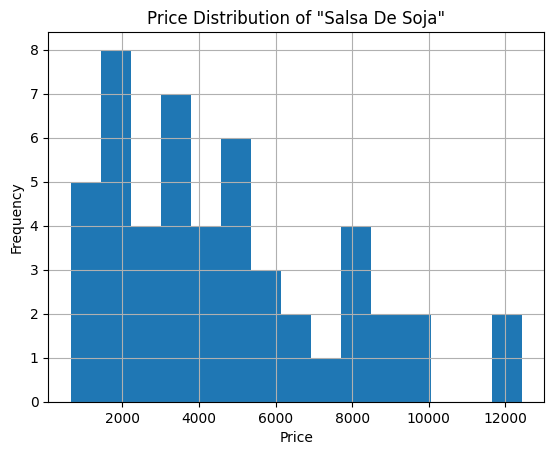

In [32]:
df.hist(column='Price', bins=15) #15 intervalos dpara el histograma
plt.xlabel('Price') #subtitulo eje X
plt.ylabel('Frequency') #subtitulo eje Y
plt.title(f'Price Distribution of "{busqueda.title()}"') #Construimos el titulo a partir de la busqueda realizada
plt.savefig(f'Busqueda - {busqueda}.png', format='png') #guardamos el histograma bajo el parametro de busqueda
plt.show() # Mostrar el gráfico